# Homework4: Instructions

Team Members:

* Deepan Chakravarthi Padmanabhan
* Jaswanth Bandlamudi
* Muhammad Umer Ahmed Khan

1) Write down 3 questions and their brief answers on the reading material. [2 Points]

**1. What is the goal of Support Vector Machines? What is margin of separation and optimal hyperplane?**

A: For a training dataset ${x_i,d_i}_{i=1}^N$ where $x_i$ is the input for the ith sample and $d_i$ is the labels/ target output. For a linearly separable data, the decision surface in the form of hyperplane is given by: 

$$w^T x + b = 0$$

where w is the weight vector and b is the bias, the separation between the hyperplane and the closet datapoint is called **margin of separation** given by $\rho$.

The **goal of SVM** is to find the particular hyperplane for which the margin of separation $\rho$ is maximized. This particular hyperplane is called **optimal hyperplane**.

**2. What are slack variables? Provide insights on the data point position with respect to decision boundary for a given slack variable value.**

In order to formally treat the non-separable data points a set of non-negative scalar variables ${\epsilon_i}_{i=1}^N$ are introduced into the hyperplane (decision surface) as below:

$$d_i(w^Tx_i + b) \geq 1- \epsilon_i$$ i = 1,2,...N

$\epsilon_i$ are slack variables. It gives the **measure of deviation of a data point** from the ideal condition of pattern separability. For $0\leq \epsilon_i \leq 1$, the data point falls inside the region of separation but on the right side of the decision surface. For $\epsilon > 1$, it falls on the wrong side of the decision surface. 


**3. Give the expression for inner-product kernel and provide insights about the inner-product kernel function.**

The inner-product kernel function is denoted by $K(x,x_i)$ and defined by,

$$K(x,x_i) = \varphi^T(x)\varphi(x_i) = \sum_{j=0}^m \varphi_j(x)\varphi_j(x_i)$$

where $\varphi^T(x)\varphi(x)$ is the inner product of two vectors induced in the feature space by the input vector x and the input pattern $x_i$ of the ith example.

The inner-product kernel is **symmetric function**, as shown by $K(x,x_i)= K(x_i,x)$ for all i. In addition, it can be used to construct the optimal hyperplane in the feature space without having to consider the feature space itself in explicit form.

2) SVM 1-D Understanding  

The graphs below represent three different one-dimensional classification (dichotomization) tasks (along a sketched x-axis, dash means 'no data point').

What is the lowest-order polynomial decision function that can correctly classify the given data? Black dots denote class 1 with target function value y1 = +1 and white dots depict class 2 with targets y2 = -1. What are the decision boundaries?
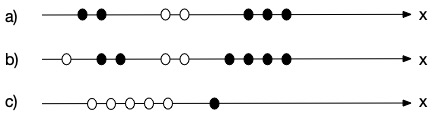 [8 points]


a)

Lowest order of the polynomial decision function: 2

For example: f(x) = x**2


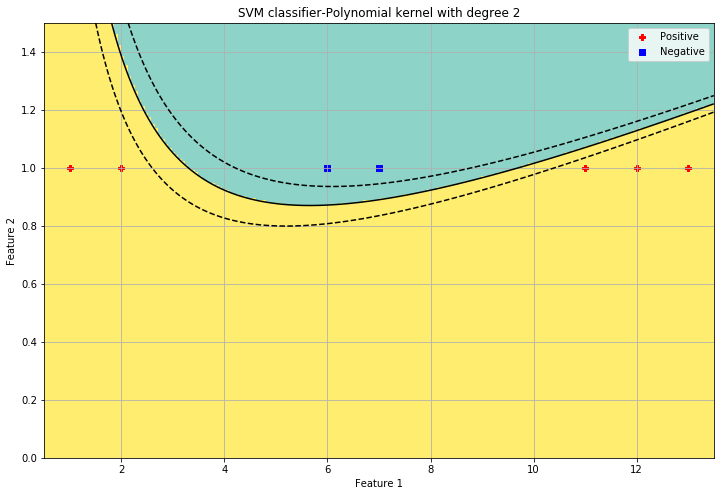



b)

Lowest order of the polynomial decision function: 3

For example: f(x) = x**3


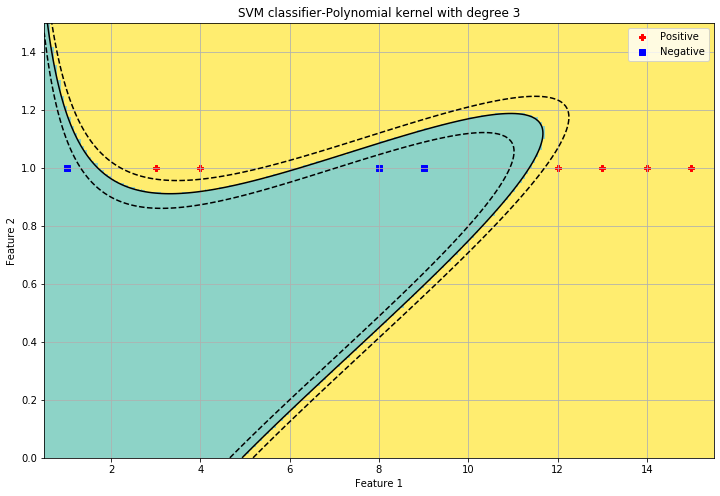



c)

Lowest order of the polynomial decision function: 0

For example: f(x) = 6.5


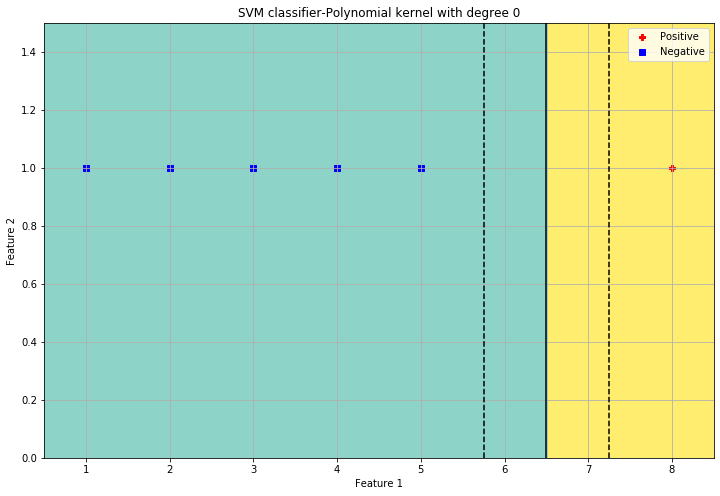

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

class SVM:
    # SVM binary classifier

    def data_preparation(self, data, labels):
        '''Create two classes of data.
        Preprocesses data for classification and plotting.
        :param: 
        data- Data
        labels- Target class/ labels'''
        self.data = data[np.newaxis].transpose()
        self.data = np.hstack((self.data, np.ones(shape=(self.data.shape))))
        self.labels = labels
        # Variables for plotting plotting
        self.positive = data[np.where(labels==1)][np.newaxis].transpose()
        self.negative = data[np.where(labels==-1)][np.newaxis].transpose()
        self.positive = np.hstack((self.positive, np.ones(shape=(self.positive.shape))))
        self.negative = np.hstack((self.negative, np.ones(shape=(self.negative.shape))))
        
    def check_fit_score(self):
        '''Calculates the normalized training score for a SVM classifier
        :return:
        True - Perfect fit for the given data (Accuracy = 100%)
        False -Data not fit perfectly (Accuracy < 100%)'''
        prediction_score= self.clf.score(self.data, self.labels)
        if prediction_score==1.0:
            return True
        else:
            return False
            

    def fit(self, kernel):
        '''Fits SVM to the dataset and finds the perfect fit degree.
        :param:
        kernel- Accepts the kernel function for inner-product eg: rbf, polynomial, linear
        degree- Degree of the function
        gamma- Controls the influence of a feature on the decision boundary.
        Higher the value of gamma, will try to exact fit the as per training data set 
        i.e. generalization error and cause over-fitting problem.
        C- Misclassification penalty. Penalty parameter C of the error term.
        It also controls the trade off between smooth decision boundary and
        classifying the training points correctly.'''
        for degree in range(0,10):
            self.clf = svm.SVC(kernel=kernel, degree=degree, gamma=1)
            self.clf.fit(self.data,self.labels)
            if self.check_fit_score():
                self.lowest_degree = degree
                return self.lowest_degree
                
        

    def plot_data(self):
        '''Plots data, decision boundary and margin of separation
        :param:
        positive- Class 1
        negative- Class 2'''
        
        x_min = self.data[:, 0].min()-0.5
        x_max = self.data[:, 0].max()+0.5
        y_min = self.data[:, 1].min()-1
        y_max = self.data[:, 1].max()+0.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = self.clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.figure(figsize=(12,8))
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Set3)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'], levels=[-0.5, 0, 0.5])
        plt.scatter(self.positive[:,0],self.positive[:,1],marker='P',c='r',label='Positive')
        plt.scatter(self.negative[:,0],self.negative[:,1],marker='s',c='b',label='Negative')
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.grid(True)
        plt.legend()
 
def SVM_1Dclassifier_run(data,labels):

    SVM_ = SVM()
    SVM_.data_preparation(data, labels)
    lowest_degree = SVM_.fit(kernel='poly')
    SVM_.plot_data()
    return lowest_degree
    
    
def main():
    print("a)\n")
    x1 = np.array([1,2,6,7,11,12,13])
    x1_labels = np.array([1,1,-1,-1,1,1,1])
    lowest_degree = SVM_1Dclassifier_run(x1,x1_labels)
    print("Lowest order of the polynomial decision function:", lowest_degree) 
    print("\nFor example: f(x) = x**2")
    # ANSWER 2
    plt.title("SVM classifier-Polynomial kernel with degree {}".format(lowest_degree))
    plt.show()
    print("\n")

    print("b)\n")
    x2 = np.array([1,3,4,8,9,12,13,14,15])
    x2_labels = np.array([-1,1,1,-1,-1,1,1,1,1])
    lowest_degree = SVM_1Dclassifier_run(x2,x2_labels)
    print("Lowest order of the polynomial decision function:", lowest_degree)
    print("\nFor example: f(x) = x**3")
    plt.title("SVM classifier-Polynomial kernel with degree {}".format(lowest_degree))
    plt.show()
    # ANSWER 3
    print("\n")

    print("c)\n")
    x3 = np.array([1,2,3,4,5,8])
    x3_labels = np.array([-1,-1,-1,-1,-1,1])
    lowest_degree = SVM_1Dclassifier_run(x3,x3_labels)
    # Data is 1D. Therefore, the drawn function passes through x=6.5. 
    # Therefore, the polynomial order is 0.
    print("Lowest order of the polynomial decision function:", lowest_degree-1)
    print("\nFor example: f(x) = 6.5")
    plt.title("SVM classifier-Polynomial kernel with degree {}".format(lowest_degree-1))
    plt.show()
    # ANSWER 0
    print("\n")

main()

# raise NotImplementedError()

# Observation:

1. The major parameters of polynomial kernels are degree, gamma and coef0. On varying these parameters, the lowest degree varies.

3) In Haykin 2ed, P6.14 shows a set of data points corresponding to two classes C1 and C2. Both coordinates x1 and x2 range from -1 to +1. Using the radial-basis function kernel  

K(x,t) = exp(-(|| x - t ||^2))  
construct the optimal hyperplane for the following data set. 

mypositive=[
-1/2 3/4+1/16
-1/2 3/4-1/16 
-3/8 3/4+1/16
-3/8 3/4-1/16
-1/4 3/4+1/16 
-1/4 3/4-1/16
-1/8 1/2+1/16
-1/8 3/4
0 1/2
0 3/4
1/8 -3/4-3/16
1/8 -3/4
1/8 -1/2-1/16
1/8 -1/2+1/16
1/8 1/4 
1/8 1/4+3/16
1/8 1/2+2/16
1/4 -3/4-2/16
1/4 -1/2-2/16
1/4 -1/16
1/4 2/16
1/4 1/4+1/16
1/4 1/2
3/8 -1/4-2/16
3/8 -3/16
3/8 1/16
3/8 1/4
1/2 -1/16
];  

mynegative=[ -1/2 1/2
-3/8 -1/2
-3/8 1/4+1/16
-3/8 1/2
-1/4 -3/4-1/16
-1/4 -3/4+1/16
-1/4 -3/16
-1/4 2/16
-1/4 1/4+1/16
-1/4 1/2-1/16
-1/8 -3/4-2/16
-1/8 -3/4
-1/8 -1/2-1/16
-1/8 -1/4-2/16
-1/8 -1/4
-1/8 3/16
-1/8 1/4+1/16
0 -1/4
0 1/16
1/16 -1/16
];

You result classification should looks as the following:
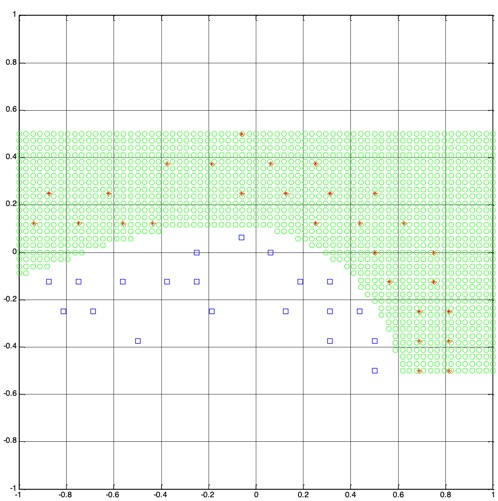

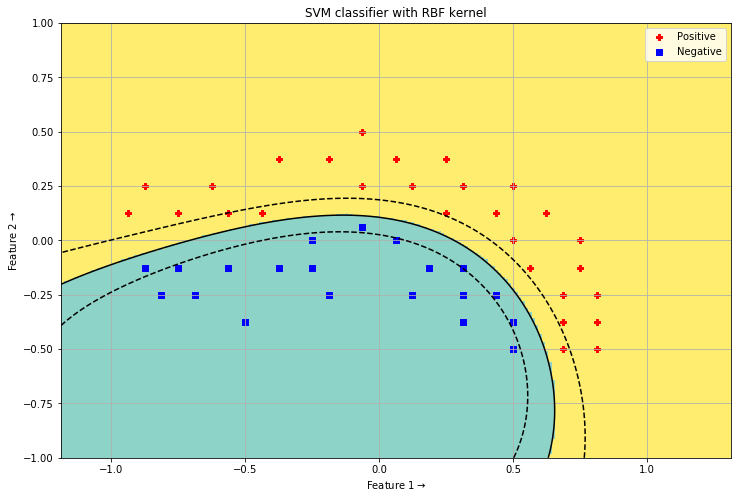

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

class SVM_:
    # SVM binary classifier using RBF kernel

    def data_preparation(self, positive, negative):
        '''Create data and labels for the dataset
        :param: 
        positive- Class 1
        negative- Class 2'''
        
        positive_labels = np.ones(len(positive))
        negative_labels = -1*np.ones(len(negative))
        self.labels = np.hstack((positive_labels, negative_labels)).transpose()
        self.data = np.vstack((positive, negative))

    def fit(self, kernel,gamma):
        '''Fits SVM to the dataset using radial basis function kernel
        :param:
        kernel- Accepts the kernel function for inner-product eg: rbf, polynomial, linear
        gamma- Controls the influence of a feature on the decision boundary.
        C- Misclassification penalty. Penalty parameter C of the error term.
        '''
        
        self.clf = svm.SVC(kernel=kernel, gamma=gamma, C=2)
        self.clf.fit(self.data,self.labels)

    def plot_data(self, positive, negative):
        '''Plots data, decision boundary and margin of separation
        :param:
        positive- Class 1
        negative- Class 2'''
        
        x_min = self.data[:, 0].min()-0.25
        x_max = self.data[:, 0].max()+0.5
        y_min = self.data[:, 1].min()-0.5
        y_max = self.data[:, 1].max()+0.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = self.clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.figure(figsize=(12,8))
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Set3)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'], levels=[-0.5, 0, 0.5])
        plt.scatter(positive[:,0],positive[:,1],marker='P',c='r',label='Positive')
        plt.scatter(negative[:,0],negative[:,1],marker='s',c='b',label='Negative')
        plt.xlabel("Feature 1$\\rightarrow$")
        plt.ylabel("Feature 2$\\rightarrow$")
        plt.title("SVM classifier with RBF kernel")
        plt.grid(True)
        plt.legend()
        plt.show()

def main():
    # Given dataset        
    positive = np.array([[ 0.8125, -0.5   ],
                   [ 0.6875, -0.5   ],
                   [ 0.8125, -0.375 ],
                   [ 0.6875, -0.375 ],
                   [ 0.8125, -0.25  ],
                   [ 0.6875, -0.25  ],
                   [ 0.5625, -0.125 ],
                   [ 0.75  , -0.125 ],
                   [ 0.5   ,  0.    ],
                   [ 0.75  ,  0.    ],
                   [-0.9375,  0.125 ],
                   [-0.75  ,  0.125 ],
                   [-0.5625,  0.125 ],
                   [-0.4375,  0.125 ],
                   [ 0.25  ,  0.125 ],
                   [ 0.4375,  0.125 ],
                   [ 0.625 ,  0.125 ],
                   [-0.875 ,  0.25  ],
                   [-0.625 ,  0.25  ],
                   [-0.0625,  0.25  ],
                   [ 0.125 ,  0.25  ],
                   [ 0.3125,  0.25  ],
                   [ 0.5   ,  0.25  ],
                   [-0.375 ,  0.375 ],
                   [-0.1875,  0.375 ],
                   [ 0.0625,  0.375 ],
                   [ 0.25  ,  0.375 ],
                   [-0.0625,  0.5   ]])


    negative = np.array([[ 0.5   , -0.5   ],
           [-0.5   , -0.375 ],
           [ 0.3125, -0.375 ],
           [ 0.5   , -0.375 ],
           [-0.8125, -0.25  ],
           [-0.6875, -0.25  ],
           [-0.1875, -0.25  ],
           [ 0.125 , -0.25  ],
           [ 0.3125, -0.25  ],
           [ 0.4375, -0.25  ],
           [-0.875 , -0.125 ],
           [-0.75  , -0.125 ],
           [-0.5625, -0.125 ],
           [-0.375 , -0.125 ],
           [-0.25  , -0.125 ],
           [ 0.1875, -0.125 ],
           [ 0.3125, -0.125 ],
           [-0.25  ,  0.    ],
           [ 0.0625,  0.    ],
           [-0.0625,  0.0625]])

    # Create object for the class
    SVM_object = SVM_()

    # Prepare the data for classification
    SVM_object.data_preparation(positive,negative)

    # Fit SVM
    SVM_object.fit(kernel='rbf', gamma=1)

    # Plot data and decision boundary of the model
    SVM_object.plot_data(positive, negative)

main()

# raise NotImplementedError()